## Predicting Medical Costs

-by Qi Sun

***

In [2]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

## Part A: Numerical Prediction - Medical Costs Regression Analysis


The purpose of this study is to build a model that can predict the medical costs. There are 7 variables in this dataset. 

**Independent variables:**

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**Dependent variable:**

charges: Individual medical costs billed by health insurance

I'll perform Linear regression, xgboost, decision tree, and SVM to construct predictive models, and select the one with best performance as the final model.


***
### Step 1: Load data into the data frame from GitHub

After reading the dataset from Github

`.head()` returns the first 5 rows of the dataset. 

In [4]:
# read the data from Github
data = pd.read_csv('https://raw.githubusercontent.com/susan-qisun/insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


***
### Step 2: Exploratory Data Analysis


#### 1. Data exploration:
`.shape` returns the number of rows by the number of columns for the dataset.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.dtypes` identifies the Data Types.

`.nunique()` returns the number of unique values for each variable.

`.isnull().sum()` checks missing values for each column.

`.count()` returns the count for each variable.

In [5]:
df = data.copy()
# check the shape for the dataframe
df.shape

(1338, 7)

In [6]:
# statistical summary of numeric variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
age,int64,47,0,1338,0,0
sex,object,2,0,1338,0,0
bmi,float64,548,0,1338,0,0
children,int64,6,0,1338,574,0
smoker,object,2,0,1338,0,0
region,object,4,0,1338,0,0
charges,float64,1337,0,1338,0,0


**Findings:**

1. There are 1338 cases in this dataset. There's no missing value.
2. There are 7 variables in this dataset. The dependent variable 'charges' is numerical. For independent variabls, age and children are numerical; sex, smoker and region are categorical.


#### 2. Visualize numerical variables

In [9]:
# define numerical, categorical data
numerical_columns = []
boolean_column = []
categorical_columns = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        categorical_columns.append(i)    
    else:
        numerical_columns.append(i)
        
print('1. Numerical variables:',numerical_columns)
print('2. Categorical variables:',categorical_columns)

1. Numerical variables: ['age', 'bmi', 'children', 'charges']
2. Categorical variables: ['sex', 'smoker', 'region']


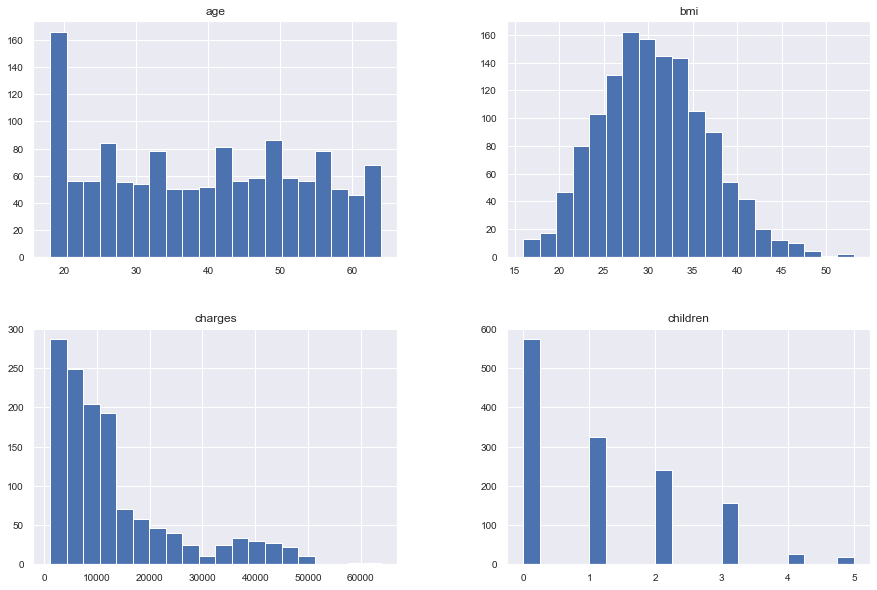

In [11]:
# Distributions for each of numerical variables
df[numerical_columns].hist(figsize=(15, 10), bins=20, xlabelsize=10, ylabelsize=10);

**Findings:**

For age, the range of value is between 18 and 64. 

For bmi, the range of value is between 15.96 and 53.13.  
 
For children, the values include 0, 1, 2, 4, 5. 

Therefore, for nunmerical variavbles, there's no outlier in this dataset. 


#### 3. Visualize categorical variables

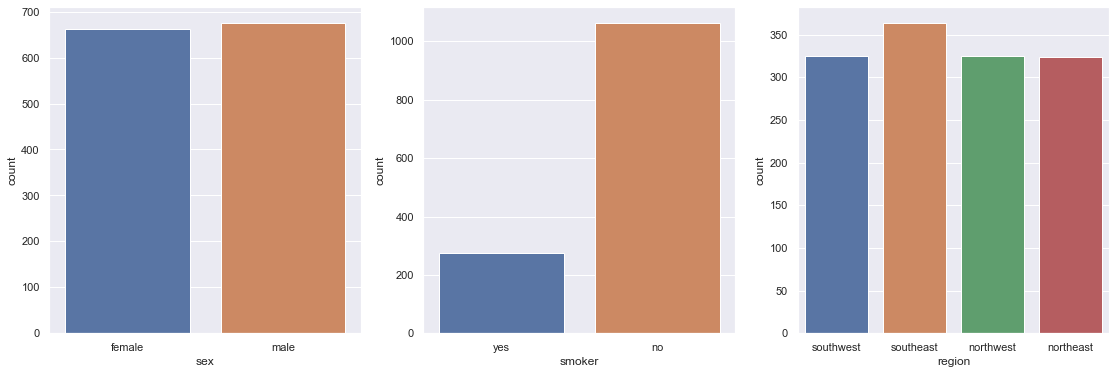

In [13]:
# create bar chart for categorical data
fig, ax = plt.subplots(1, 3, figsize=(19, 6))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)


#### 4. Visualize the relationship between dependent variable and numerical variables

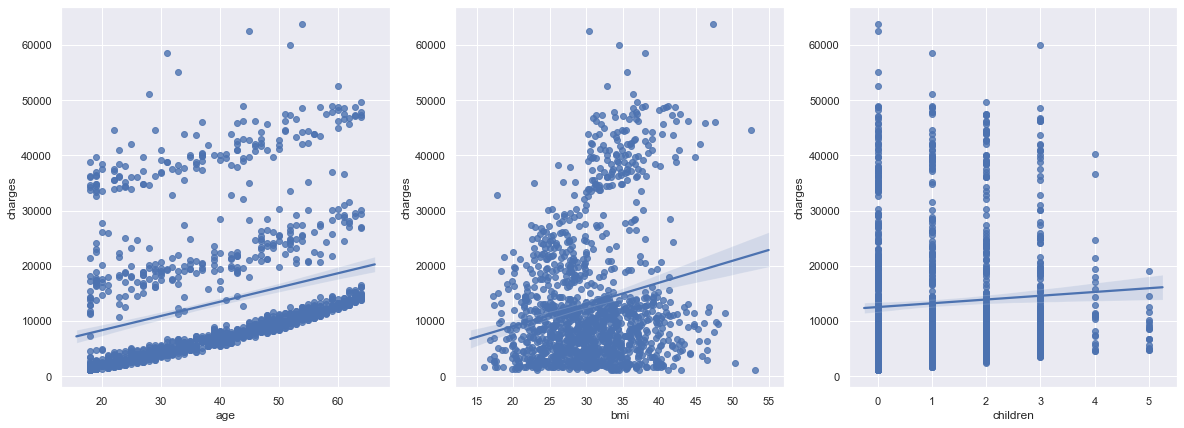

In [17]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.regplot(x='age',y='charges',data=df)
plt.subplot(1,3,2)
sns.regplot(x='bmi',y='charges',data=df)
plt.subplot(1,3,3)
sns.regplot(x='children',y='charges',data=df);



#### 5. Visualize the relationship between dependent variable and categorical variables

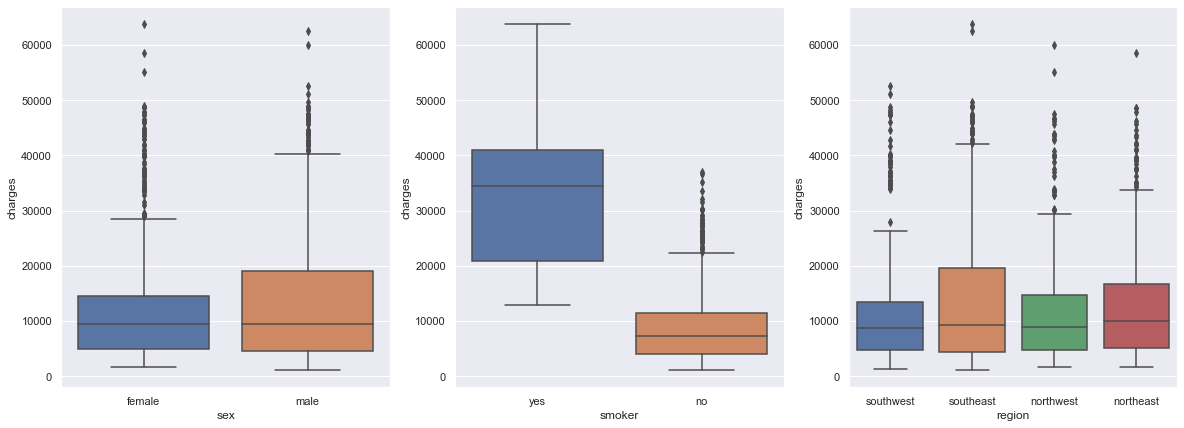

In [18]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(x='sex',y='charges',data=df)
plt.subplot(1,3,2)
sns.boxplot(x='smoker',y='charges',data=df)
plt.subplot(1,3,3)
sns.boxplot(x='region',y='charges',data=df);

**Findings:**

From the plots above, all numerical variable and categorical variables are predictive to the medical costs.

***
### Step 3: Data transformation

#### 1. Label the binary dependent variable

In [39]:
df02=df.copy()

# label 'smoker' 
df03 = df02.replace({'smoker':{'yes':1,'no':0}})
df03['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [40]:
# label 'smoker' 
df04 = df03.replace({'sex':{'female':1,'male':0}})
# rename variable
df04 = df04.rename(columns = {"sex": "IsFemale"}) 
df04['IsFemale'].value_counts()

0    676
1    662
Name: IsFemale, dtype: int64

#### 2. Convert categorical variable 'region' into dummy variables

In [41]:
# create dummy for categorical data
categorical_independent = ['region']

df_dummy = pd.get_dummies(df04,columns=categorical_independent,drop_first=True)

df_dummy.head()

,age,IsFemale,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


#### 3. Feature Scaling using MinMaxScaler (except dummy variables)

Before doing feature scaling, I'll split data into training and testing subsets by using the `train_test_split` function. 

Since some variables have different scales, we'll use `MinMaxScaler` to transform features by scaling each feature to a given range. This range is set at (0,1). I'll not perform feature scaling for dummy variables. 

In [47]:
# split train,test
from sklearn.model_selection import train_test_split

df_final = df_dummy.copy()

# Create X and y
X = df_final.drop(["charges"],axis=1)
y = df_final[['charges']]

# Now split the data into training and testing subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



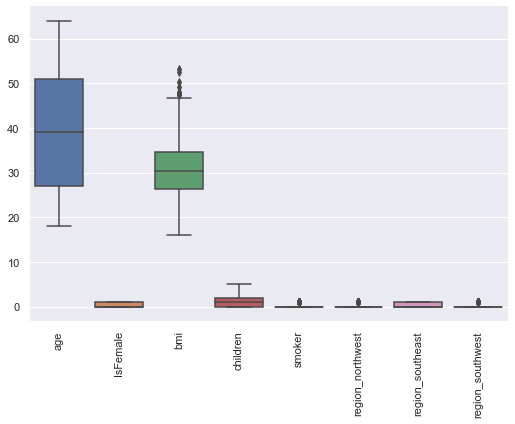

In [48]:
columns_std=['age', 'IsFemale', 'bmi', 'children', 'smoker',
       'region_northwest', 'region_southeast', 'region_southwest']

# plot numerical features (non-dummy features) before scaling
sns.catplot(data=df_dummy[columns_std], kind='box' , aspect=1.5);
plt.xticks(rotation=90);

In [49]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

# Applying Feature Scaling
sc = MinMaxScaler()

X_train[columns_std] = sc.fit_transform(X_train[columns_std])

X_test[columns_std] = sc.transform(X_test[columns_std])

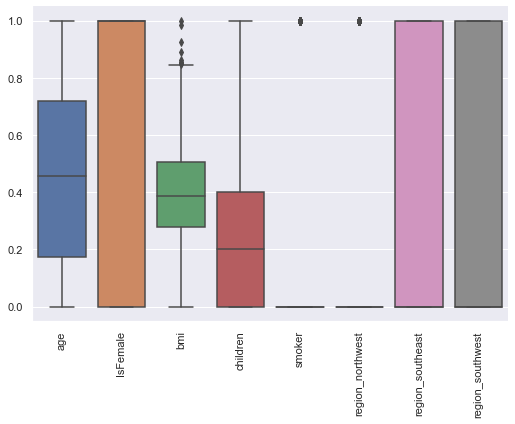

In [50]:
# plot after applying Feature Scaling ( MinMaxScaler )
sns.catplot(data=X_train[columns_std] , kind='box' , aspect=1.5);
plt.xticks(rotation=90);

***
### Step 4: Machine Learning Models

#### 1. Multiple Linear regression

In [52]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Instantiate model
LR_model = LinearRegression()

# build model
LR_model.fit(X_train, y_train)


LinearRegression()

#### 2. Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
# Instantiate model
tree = DecisionTreeRegressor(random_state = 0)

#fit the model
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

#### 3. SVM

In [57]:
from sklearn.svm import SVR
# Instantiate model
svm_regressor = SVR()

#fit the model
svm_regressor.fit(X_train, y_train)


SVR()

#### 4. XGBoost

In [78]:
import xgboost as xgb
# Instantiate model
xgboost_regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

#fit the model
xgboost_regressor.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### 5.   Model Evaluation

**1) r2:**

R-squared is the proportion of variance explained. It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model.
R-squared is between 0 and 1. Higher values are better because it means that more variance is explained by the model.

In [79]:
from sklearn.metrics import r2_score

# linear regression
print(r2_score(y_test, LR_model.predict(X_test)))

# decision tree
print(r2_score(y_test, tree.predict(X_test)))

# SVM
print(r2_score(y_test, svm_regressor.predict(X_test)))

# XGBoost
print(r2_score(y_test, xgboost_regressor.predict(X_test)))

0.7999876970680433
0.6664038139385555
-0.10172535621046586
0.8787592512992969


**2) RMSE:**

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors. Smallest RMSE is the best.

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# linear regression
print(np.sqrt(mean_squared_error(y_test, LR_model.predict(X_test))))

# decision tree
print(np.sqrt(mean_squared_error(y_test, tree.predict(X_test))))

# SVM
print(np.sqrt(mean_squared_error(y_test, svm_regressor.predict(X_test))))

# XGBoost
print(np.sqrt(mean_squared_error(y_test, xgboost_regressor.predict(X_test))))

5641.62655885019
7285.955566620104
13240.752033895275
4392.383837126394


**3) MAE:**

Mean Absolute Error (MAE) is the mean of the absolute value of the errors. Smallest RMSE is the best.


In [81]:
from sklearn.metrics import mean_absolute_error

# linear regression
print(mean_absolute_error(y_test, LR_model.predict(X_test)))

# decision tree
print(mean_absolute_error(y_test, tree.predict(X_test)))

# SVM
print(mean_absolute_error(y_test, svm_regressor.predict(X_test)))

# XGBoost
print(mean_absolute_error(y_test, xgboost_regressor.predict(X_test)))

3933.272649405241
3543.347990593284
8589.560707867857
2684.939669082672


**Compare Models:**

| Metric        | linear Regression | decision tree | SVM  | XGBoost  | 
| ------------- | ------- | ------- | ------- | ------- |
| # Indep. Vars |  8     |   8     |   8  | 8 | 
| r2_score  | 0.8  | 0.67 |  -0.1  | 0.88 | 
|  Root Mean Squared Error(RMSE)  |5641.63 | 7285.96 |  13240.75 | 4392.38 | 
|  Mean Absolute Error (MAE)   | 3933.27  |3543.35 | 8589.56 | 2684.94 | 


**Results:**

> From the results above, the XGBoost model has the highest r2_score and lowest RMSE and MAE. Therefore, XGBoost model is the best model.

## Part B: Yes/No Prediction - Loan Eligibility Prediction


The purpose of this study is to build a model that can predict if a customer is eligible for the home loan. There are 13 variables in this dataset. 

**Independent variables:**

Loan_ID:	Unique Loan ID

Gender:	Male/ Female

Married:	Applicant married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/ Under Graduate)

Self_Employed:	Self-employed (Y/N)

ApplicantIncome:	Applicant income

CoapplicantIncome:	Coapplicant income

LoanAmount:	Loan amount in thousands

Loan_Amount_Term:	Term of a loan in months

Credit_History:	credit history meets guidelines

Property_Area:	Urban/ Semi-Urban/ Rural


**Dependent variable:**

Loan_Status:	Loan approved (Y/N)

I'll perform Binary Logistic Regression, Multinomial Logistic Regression, and Ordinal Logistic Regression to construct predictive models, and select the one with best performance as the final model.




***
### Step 1: Load data into the data frame from GitHub

After reading the dataset from Github

`.head()` returns the first 5 rows of the dataset. 

In [192]:
# read data from Github
df11 = pd.read_csv("https://raw.githubusercontent.com/susan-qisun/loan-train.csv")

# To display the top 5 rows
df11.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


***
### Step 2: Exploratory Data Analysis


#### 1. Data exploration:
`.shape` returns the number of rows by the number of columns for the dataset.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.dtypes` identifies the Data Types.

`.nunique()` returns the number of unique values for each variable.

`.isnull().sum()` checks missing values for each column.

`.count()` returns the count for each variable.

In [83]:
print(df11.shape)
print(list(df11.columns))

(614, 13)
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [193]:
#Identify the Data Types
df_info = pd.DataFrame(df11.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df11.nunique()

#check missing values for each column
df_info['MissingValues']=df11.isnull().sum()

# Identify the count for each variable
df_info['Count']=df11.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df11==0).sum()

# how many '?' values
df_info['?Values']=(df11=='?').sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
Loan_ID,object,614,0,614,0,0
Gender,object,2,13,601,0,0
Married,object,2,3,611,0,0
Dependents,object,4,15,599,0,0
Education,object,2,0,614,0,0
Self_Employed,object,2,32,582,0,0
ApplicantIncome,int64,505,0,614,0,0
CoapplicantIncome,float64,287,0,614,273,0
LoanAmount,float64,203,22,592,0,0
Loan_Amount_Term,float64,10,14,600,0,0


**Findings:**

There are some missing values in this dataset. I'll handle them later.

#### 2. Visualize numerical variables

In [85]:
# define numerical, categorical, and boolean data
numerical_columns = []
boolean_column = []
categorical_columns = []

for i in df11.columns[:]:
    if(df11[i].dtype=='object'):
        categorical_columns.append(i)    
    else:
        numerical_columns.append(i)
        
print('1. Numerical variables:',numerical_columns)
print('2. Categorical variables:',categorical_columns)

1. Numerical variables: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
2. Categorical variables: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


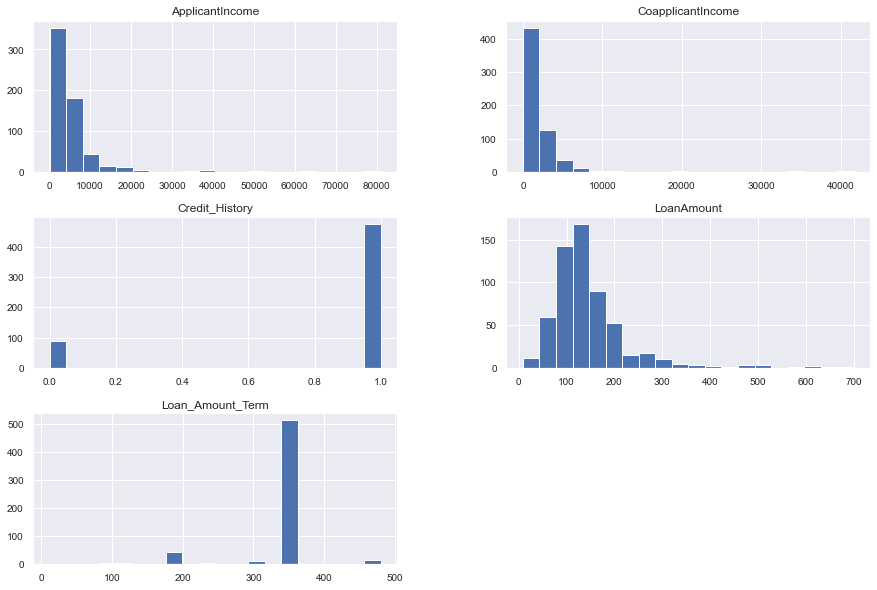

In [86]:
# Distributions for each of numerical variables.
df11[numerical_columns].hist(figsize=(15, 10), bins=20, xlabelsize=10, ylabelsize=10);

#### 3. Visualize categorical variables

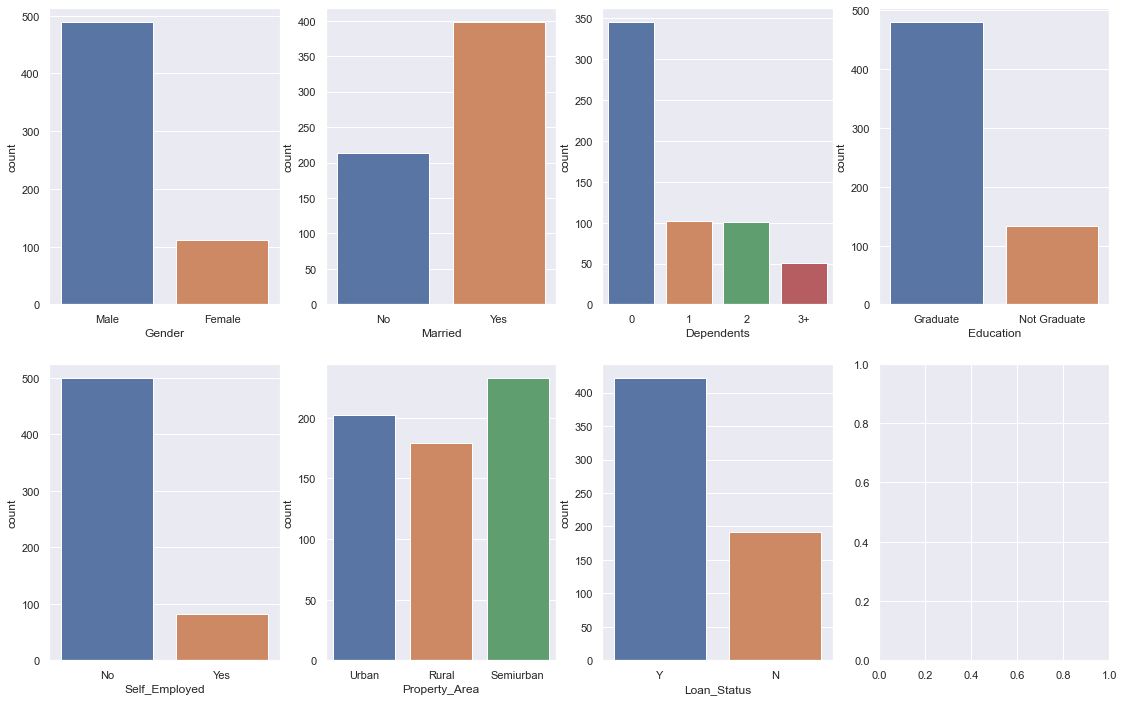

In [91]:
categorical_columns02 = ['Gender', 'Married', 'Dependents', 'Education', 
                           'Self_Employed', 'Property_Area', 'Loan_Status']
    
# create bar chart for categorical data
fig, ax = plt.subplots(2, 4, figsize=(19, 12))
for variable, subplot in zip(categorical_columns02, ax.flatten()):
    sns.countplot(df11[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

***
### Step 3: Data transformation

#### 1. Drop irrelevant column 'Loan_ID'

In [194]:
df12 = df11.copy()

# drop column EmployeeNumber
df13 = df12.drop(columns = ['Loan_ID'])

#### 2. Handle missing values


In [195]:
df13.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Findings:**

For columns of Married, Dependents, Self_Employed, Credit_History, the missing values in these columns can be viewed as 0 or no.

For missing values in other columns, I'll use mean amd mode to replace with NaN values.

In [196]:
# fill with No or 0
df13['Married']= df13['Married'].fillna('No')
df13['Dependents']= df13['Dependents'].fillna('0')
df13['Self_Employed']= df13['Self_Employed'].fillna('No')
df13['Credit_History']= df13['Credit_History'].fillna(0)

In [197]:
# fill with mean/mode
df13['LoanAmount'].fillna(df13['LoanAmount'].mean(), inplace=True) # Mean
df13['Loan_Amount_Term'].fillna(df13['Loan_Amount_Term'].mode()[0], inplace=True) # Mode
df13['Gender'].fillna(df13['Gender'].mode()[0], inplace=True)

In [198]:
df13.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### 3. Correct data type 'Credit_History'

Since the variable 'Credit_History' has two values -0/1. I'll convert this variable into binary categorical variable.


In [199]:
df13[['Credit_History']] = df13[['Credit_History']].astype('str')

#### 4. Label the binary dependent variable

In [200]:
df14 = df13.replace({'Loan_Status':{'Y':1,'N':0}})
df14['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### 5. Convert categorical variable  into dummy variables

In [201]:
# create dummy for categorical data

categorical_columns03= ['Gender', 'Married', 'Dependents', 'Education', 
                        'Self_Employed', 'Credit_History', 'Property_Area']
    
df_dummy02 = pd.get_dummies(df14,columns=categorical_columns03,drop_first=True)

df_dummy02.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1,1,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,0,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120.000000,360.0,1,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141.000000,360.0,1,1,0,0,0,0,0,0,1,0,1


#### 6.  Feature Scaling using MinMaxScaler (except dummy variables)

In [203]:
df_final02 = df_dummy02.copy()

# Create X and y
X = df_final02.drop(["Loan_Status"],axis=1)
y = df_final02[['Loan_Status']]

# Now split the data into training and testing subsets. 
X_train01, X_test01, y_train01, y_test01 = train_test_split(X, y, test_size=0.2, random_state=12)



In [204]:
columns_std=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

# Applying Feature Scaling
sc = MinMaxScaler()
X_train01[columns_std] = sc.fit_transform(X_train01[columns_std])

X_test01[columns_std] = sc.transform(X_test01[columns_std])

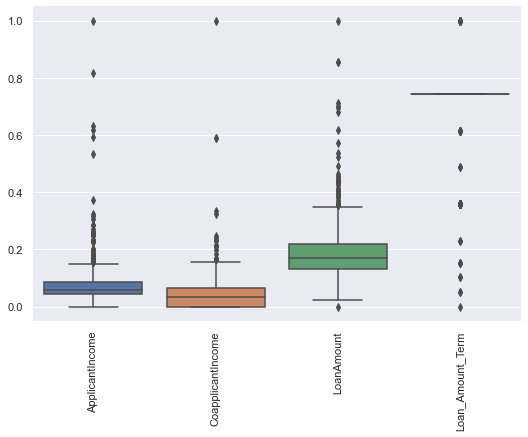

In [205]:
# plot after Applying Feature Scaling ( MinMaxScaler )
sns.catplot(data=X_train01[columns_std] , kind='box' , aspect=1.5);
plt.xticks(rotation=90);

***
### Step 4: Machine Learning Models

#### 1. Binary Logistic Regression


In [257]:
from sklearn.linear_model import LogisticRegression
# Instantiate model
logreg = LogisticRegression(class_weight='balanced')

#fit the model
logreg.fit(X_train01, y_train01)


LogisticRegression(class_weight='balanced')

#### 2. Multinomial Logistic Regression


In [272]:
# Instantiate model
model_multi = LogisticRegression(multi_class='multinomial')

#fit the model
model_multi.fit(X_train01, y_train01)

LogisticRegression(multi_class='multinomial')

#### 3. Ordinal Logistic Regression


In [227]:
#mord is a Python package that implements some ordinal regression methods following the scikit-learn API.
from mord import OrdinalRidge

# Instantiate model
model_ordinal = OrdinalRidge()  

#fit the model
model_ordinal.fit(X_train01, y_train01)


OrdinalRidge()

#### 4. Model Evaluation

**1) AUC and ROC:**


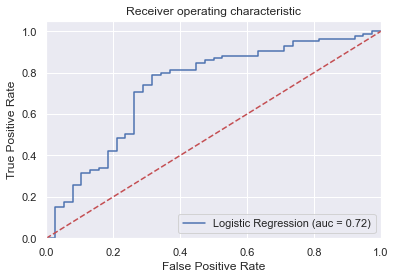

In [266]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Logistic regression
logit_roc_auc = roc_auc_score(y_test01, logreg.predict(X_test01))
fpr, tpr, thresholds = roc_curve(y_test01, logreg.predict_proba(X_test01)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

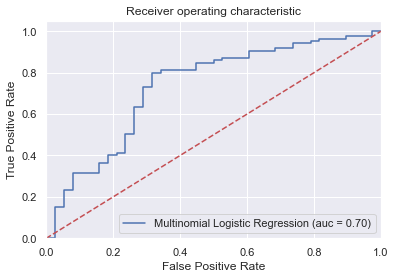

In [273]:
# Multinomial Logistic Regression
multi_roc_auc = roc_auc_score(y_test01, model_multi.predict(X_test01))
fpr, tpr, thresholds = roc_curve(y_test01, model_multi.predict_proba(X_test01)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Multinomial Logistic Regression (auc = %0.2f)' % multi_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [245]:
# Ordinal Logistic Regression

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score

cross_val_score(model_ordinal, X_test01, y_test01, cv=10, scoring='roc_auc').mean()


0.6557142857142857

**2) Confusion Matrix:**


In [269]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic regression
y_pred01 = logreg.predict(X_test01)

cm01 = confusion_matrix(y_test01, y_pred01)
print(cm01)

print("Classification Report")
print(classification_report(y_test01, y_pred01))

[[27 11]
 [23 62]]
Classification Report
              precision    recall  f1-score   support

           0       0.54      0.71      0.61        38
           1       0.85      0.73      0.78        85

    accuracy                           0.72       123
   macro avg       0.69      0.72      0.70       123
weighted avg       0.75      0.72      0.73       123



In [274]:
# Multinomial Logistic Regression

y_pred02 = model_multi.predict(X_test01)

cm02 = confusion_matrix(y_test01, y_pred02)
print(cm02)

print("Classification Report")
print(classification_report(y_test01, y_pred02))

[[22 16]
 [16 69]]
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        38
           1       0.81      0.81      0.81        85

    accuracy                           0.74       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.74      0.74      0.74       123



In [252]:
# Ordinal Logistic Regression

y_pred03 = model_ordinal.predict(X_test01)

cm03 = confusion_matrix(y_test01, y_pred03)
print(cm03)

print("Classification Report")
print(classification_report(y_test01, y_pred03))

[[23 15]
 [16 69]]
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        38
           1       0.82      0.81      0.82        85

    accuracy                           0.75       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.75      0.75      0.75       123



**Results:**

> From the results above, the Logistic Regression has the highest roc_auc_score and macro precision, F1 scores. Therefore, I choose Logistic Regression as teh best model.


## Part C: Clustering - Medical Costs Regression Analysis

### K-means clustering


#### 1. The Elbow Method

I'll use the elbow method to determine K - the number of clusters.

Running K-Means with a range of k. The elbow method runs k-means clustering on the dataset for a range of values for k (from 1-10 in this case) and then for each value of k computes an average score for all clusters.


In [239]:
# read the data from Github
data = pd.read_csv('https://raw.githubusercontent.com/susan-qisun/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [275]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

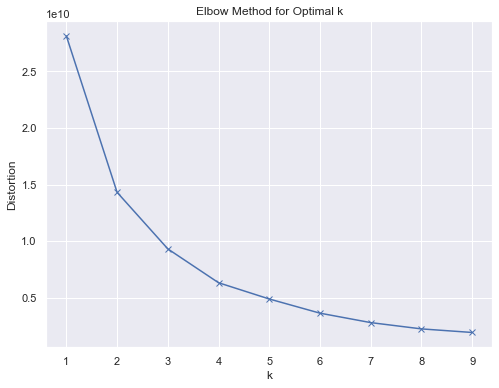

In [276]:
plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

We can observe that the “elbow” is the number 3 which is optimal for this case, which means we could cluster the data set into 3 clusters.


#### 2. Implement k-means with k=3

In [283]:
#Modeling
kmeans = KMeans(n_clusters=3)
kfit = kmeans.fit(X)
identified_clusters = kfit.predict(X)


In [286]:
#Appending the identified clusters to the original data
clustered_data = X.copy()
clustered_data['Cluster'] = identified_clusters

clustered_data['Cluster'].value_counts()


2    535
1     72
0      7
Name: Cluster, dtype: int64

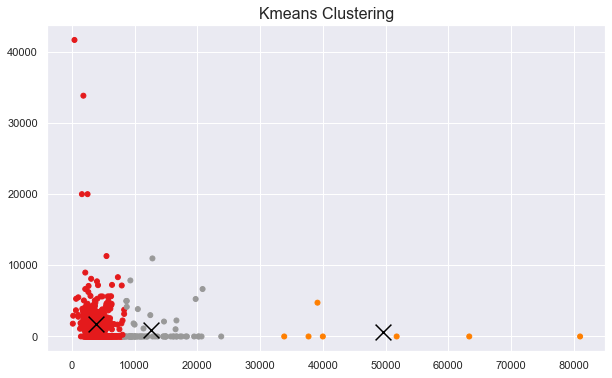

In [282]:
# plot the clustering
fig = plt.figure(figsize=(10,6))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering", fontsize=16)
plt.show()


**Findings:**

From the results above we can see that there are three groups. The 0 value(N=7) grouping is much lower than 1(N=72) value grouping and 2(N=535) value grouping. And the value 2 takes up about 87 percentage of all the groupings which means most of patient in this dataset have the medical costs lower than 10000. 